In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cwt, find_peaks_cwt, ricker, welch
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_ach_at = pd.read_hdf("../data/processed/ach_at_hex_6000.h5")


In [4]:
df_ach_at.head()

,id,0,1,2,3,4,5,6,7,8,...,52,53,54,55,56,57,58,59,subject,y
0,1.0,-135.904409,-126.704873,-129.462254,-121.519825,-124.371209,-102.553959,-426.883940,-103.540012,-293.788800,...,-140.741374,-136.679302,-182.152656,-145.942890,-145.357315,-137.695972,-143.410471,-141.207962,00_0315_ach-at_0,0
1,1.0,-135.970862,-126.796326,-129.559494,-121.627592,-124.485424,-102.687438,-426.496982,-103.706237,-293.582639,...,-140.782349,-136.725187,-181.736284,-145.996543,-145.411239,-137.754658,-143.477315,-141.291289,00_0315_ach-at_0,0
2,1.0,-136.036568,-126.887027,-129.655970,-121.734591,-124.598914,-102.820126,-426.112029,-103.871656,-293.377845,...,-140.822649,-136.770327,-181.322447,-146.049450,-145.464410,-137.812580,-143.543406,-141.373857,00_0315_ach-at_0,0
3,1.0,-136.101527,-126.976977,-129.751683,-121.840824,-124.711680,-102.952022,-425.729129,-104.036270,-293.174450,...,-140.862274,-136.814723,-180.911182,-146.101611,-145.516827,-137.869738,-143.608744,-141.455666,00_0315_ach-at_0,0
4,1.0,-136.165739,-127.066176,-129.846632,-121.946291,-124.823721,-103.083127,-425.348329,-104.200076,-292.972489,...,-140.901224,-136.858376,-180.502526,-146.153025,-145.568492,-137.926133,-143.673330,-141.536716,00_0315_ach-at_0,0


In [35]:
# visualise some of the data
# look at the 1st window (baseline) where y = 0
df_window_1 = (df_ach_at.iloc[540000:546000,:]
               .drop(columns = ['y','subject'])
               .set_index('id')
               .reset_index(drop=True))

# take the 1st window with y = 1
df_window_2 = (df_ach_at.iloc[180000:186000,:]
               .drop(columns = ['y','subject'])
               .set_index('id')
               .reset_index(drop=True))

# take the 1st window with y = 2
df_window_3 = (df_ach_at.iloc[360000:366000,:]
               .drop(columns = ['y','subject'])
               .set_index('id')
               .reset_index(drop=True))

df_window_4 = (df_ach_at.iloc[900000:906000,:]
               .drop(columns = ['y','subject'])
               .set_index('id')
               .reset_index(drop=True))

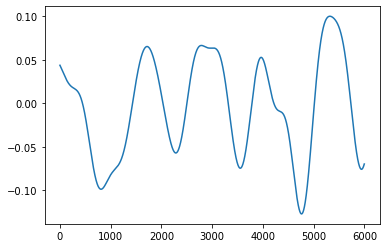

In [34]:
# plt.plot(df_window_1[54])
# plt.plot(df_window_1[51])
# plt.plot(df_window_1[54] - df_window_1[51])

slope = pd.Series(np.gradient(df_window_2[1].values), df_window_2.index, name='slope')
plt.plot(slope)



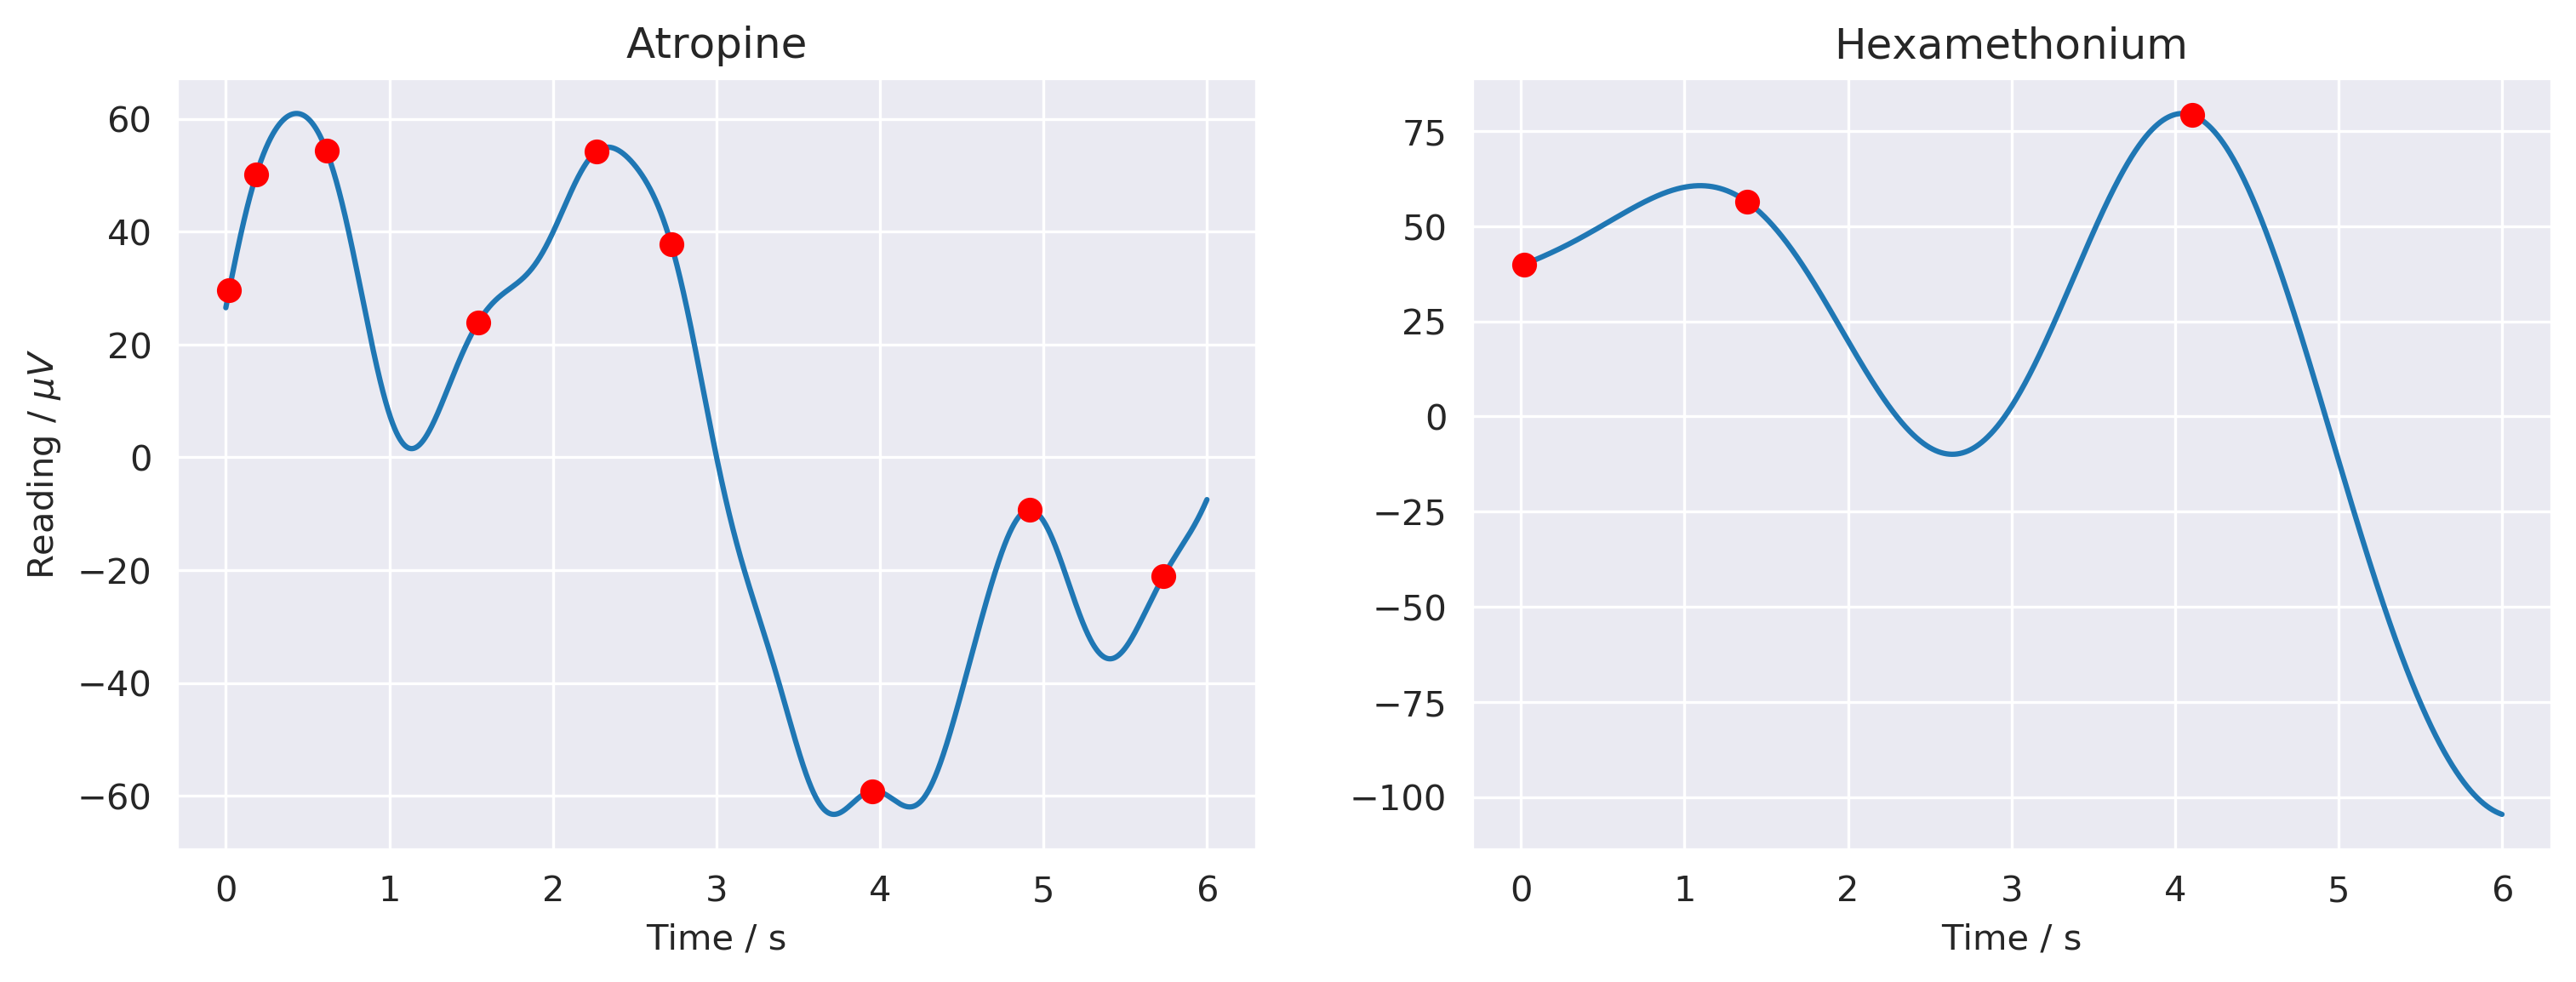

In [45]:
sns.set_style('darkgrid')
# sample rate
fs = 1000

# time vector (10s)
t = np.arange(0,6,1/fs)

# heart rates to test
rates = np.array([5])

# # create periodic signal that looks a  little like a heartbeat
# signal = abs(np.sin(t*np.pi*rates[2])**3)

# #add noise
# signal_w_noise = signal + np.random.randn(len(signal))*0.1
signal_w_noise_at = df_window_3.loc[:,51]
signal_w_noise_hex = df_window_4.loc[:,51]

# #find peaks
peaks_at = find_peaks_cwt(signal_w_noise_at, fs/rates/10, wavelet=ricker)
peaks_hex = find_peaks_cwt(signal_w_noise_hex, fs/rates/10, wavelet=ricker)

f = plt.figure(figsize = (12,4), dpi = 300)
# f.suptitle('Continuous Wavelet Transform Peaks for AT and Hex Recordings')
plt.subplot(121)
plt.plot(t,signal_w_noise_at)
plt.plot(t[peaks_at],signal_w_noise_at[peaks_at],'ro', label='Identified Peak')
plt.title('Atropine')
plt.xlabel('Time / s')
plt.ylabel('Reading / $\mu V$')
plt.subplot(122)
plt.plot(t,signal_w_noise_hex)
plt.plot(t[peaks_hex],signal_w_noise_hex[peaks_hex],'ro')
plt.title('Hexamethonium')
plt.xlabel('Time / s')
# f.legend()
f.savefig('../reports/figures/cwt_peaks_at_v_hex.png')



In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df_ach_at.drop(columns=['id','y','subject']))
norm_1 = scaler.transform(df_ach_at.drop(columns=['id','y','subject']))

In [41]:
norm_1 = pd.DataFrame(norm_1)

In [42]:
norm_1['id'] = df_ach_at['id']
norm_1['subject'] = df_ach_at['subject']
norm_1['y'] = df_ach_at['y']

In [18]:
norm_1.to_hdf('../data/processed/ach_at_hex_normalised.h5', key='data', complevel=9)

In [48]:
# visualise some of the data
# look at the 1st window (baseline) where y = 0
df_window_1 = (norm_1.iloc[540000:546000,15:25]
               .reset_index(drop=True))

# take the 1st window with y = 1
df_window_2 = (norm_1.iloc[180000:186000,15:25]
               .reset_index(drop=True))

# take the 1st window with y = 2
df_window_3 = (norm_1.iloc[360000:366000,15:25]
               .reset_index(drop=True))

df_window_4 = (norm_1.iloc[900000:906000,15:25]
               .reset_index(drop=True))

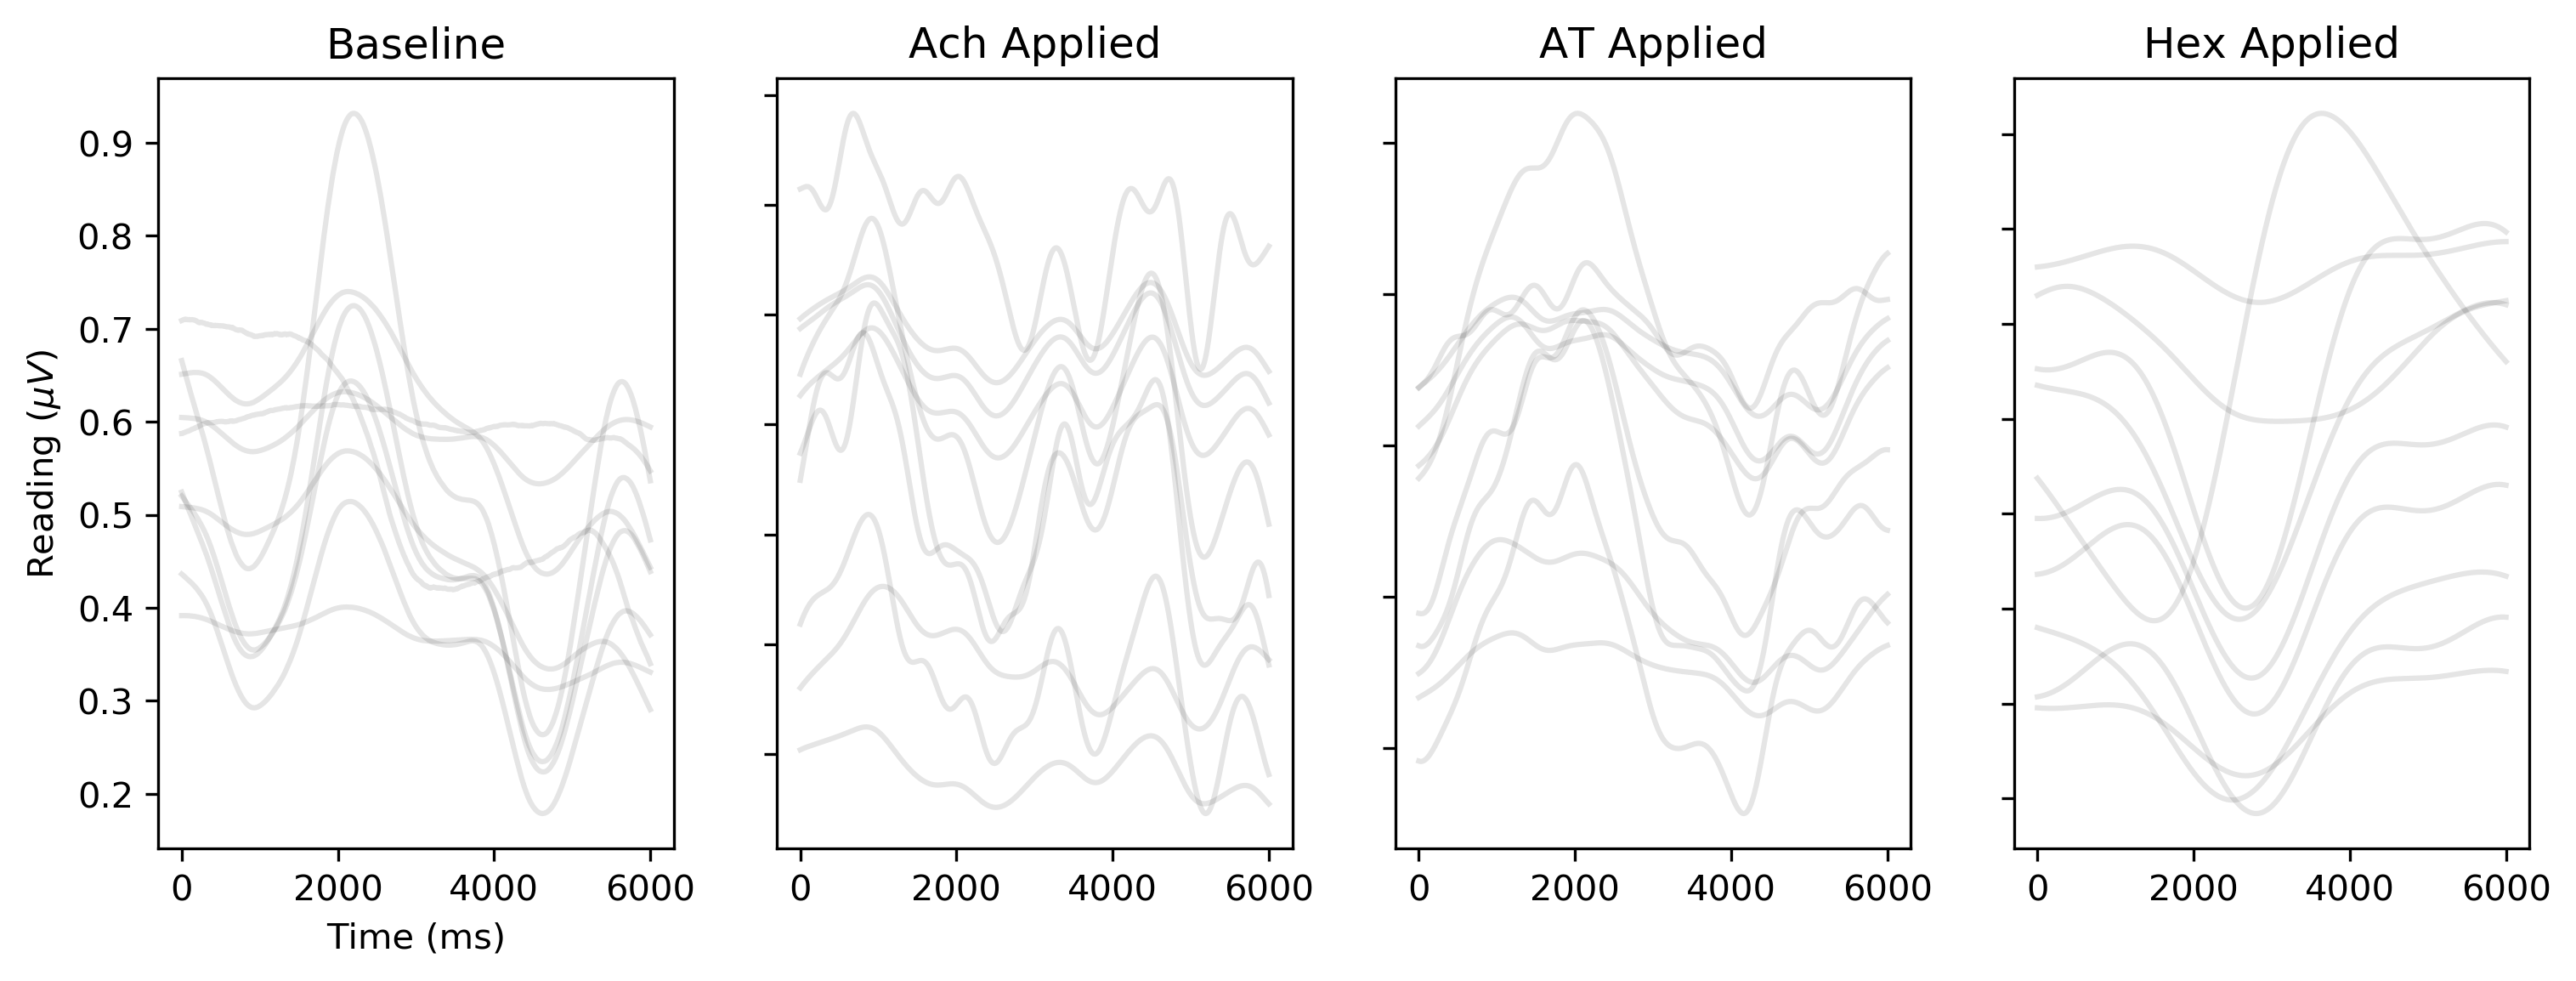

In [49]:
caption = "Each line represents the reading from a single electrode in the microelectrode array"

f = plt.figure(figsize = (12,4), dpi = 300)
plt.subplot(141)
plt.xlabel("Time (ms)")
plt.ylabel("Reading ($\mu V$)")
# plt.ylim(-350,350)
plt.plot(df_window_1, 'k', alpha=0.1)
# plt.plot(df_window_1['mean'], 'r')
plt.title("Baseline")
# plt.text(0, -550, caption)
plt.subplot(142, yticklabels = [])

plt.plot(df_window_2, 'k', alpha=0.1)
# plt.plot(df_window_2['mean'], 'r')
# plt.ylim(-350,350)
plt.title("Ach Applied")
plt.subplot(143, yticklabels = [])
plt.plot(df_window_3, 'k', alpha=0.1)
# plt.plot(df_window_3['mean'], 'r')
# plt.ylim(-350,350)
plt.title("AT Applied")
plt.subplot(144, yticklabels = [])
plt.plot(df_window_4, 'k', alpha=0.1)
# plt.plot(df_window_4['mean'], 'r')
# plt.ylim(-350,350)
plt.title("Hex Applied")
plt.show()
f.savefig('../reports/figures/raw_sigs_no_mean.png')